In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('peeled_data.csv', sep=';', index_col="Zeitpunkt")

In [3]:
df.index =  pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')

In [4]:
df.head()

,Kennzeichen,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
Zeitpunkt,,,,,,,,
2017-01-02 06:10:00,K,PKW,SKODA,HOCHSTADENSTR.,NaN,141312,NaN,NaN
2017-01-02 06:10:00,K,PKW,FORD,LUXEMBURGER STR.,19,141312,NaN,NaN
2017-01-02 06:25:00,K,PKW,FIAT,MOLTKESTR.,48A,141312,NaN,NaN
2017-01-02 06:25:00,OS,PKW,FORD,MOLTKESTR.,44,141312,NaN,NaN
2017-01-02 06:25:00,FB,PKW,AUDI,MOLTKESTR.,52,141312,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70266 entries, 2017-01-02 06:10:00 to 2017-01-31 22:11:00
Data columns (total 8 columns):
Kennzeichen    70266 non-null object
fahrzeugart    70266 non-null object
fabrikat       70181 non-null object
strasse        70266 non-null object
hausnummer     49191 non-null object
tatbestand1    70266 non-null object
tatbestand2    3881 non-null object
tatbestand3    301 non-null object
dtypes: object(8)
memory usage: 4.8+ MB


NaN-Werte zählen

In [6]:
df.isnull().sum()

Kennzeichen        0
fahrzeugart        0
fabrikat          85
strasse            0
hausnummer     21075
tatbestand1        0
tatbestand2    66385
tatbestand3    69965
dtype: int64

Wenn 90% der Daten NaN sind, kann das Merkmal entfernt werden

In [7]:
df.shape

(70266, 8)

### Untersuchung Kennzeichen - Wer taucht wie oft im Datensatz auf ?

In [8]:
df_knz = df.groupby(['Kennzeichen']).size()

In [9]:
df_knz

Kennzeichen
01      2
0141    1
02      2
04      2
06      1
       ..
ZI      1
ZJ      3
ZS 9    2
ZW      5
ÖHR     1
Length: 845, dtype: int64

In [10]:
df_knz.sort_values(inplace=True, ascending=False)

In [11]:
df_knz.head(10)

Kennzeichen
K      41627
BM      4811
SU      2536
GL      2497
BN      1176
LEV      935
D        935
M        827
NE       816
GM       700
dtype: int64

### Welches Fabrikat ist betroffen ?

In [12]:
df_fabrikat = df.groupby(['fabrikat']).size()

In [13]:
df_fabrikat.sort_values(inplace=True, ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text xticklabel objects>)

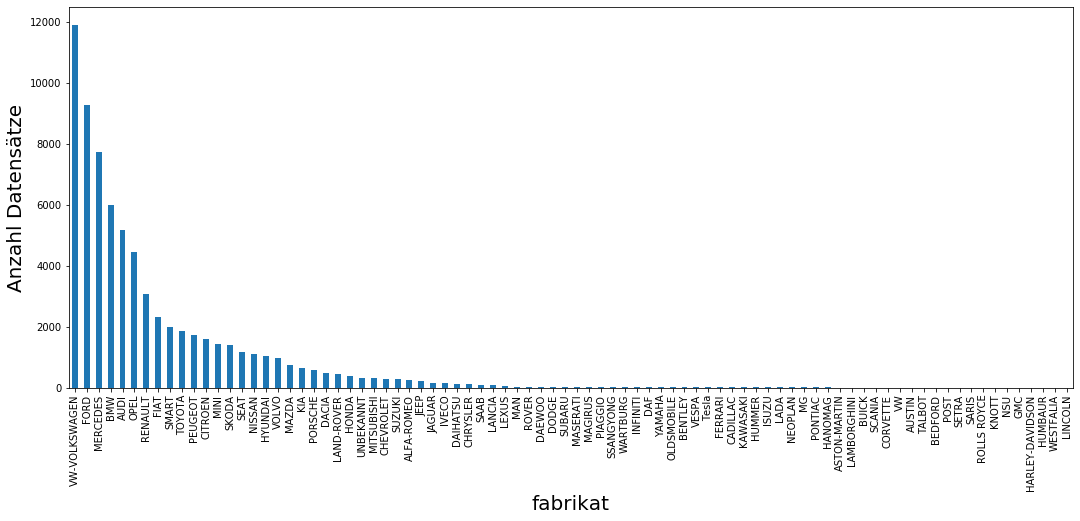

In [14]:
a4_dims = (18,7)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_ylabel("Anzahl Datensätze", fontsize=20)
ax.set_xlabel("Fabrikat", fontsize=20)
loc = plt.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax = df_fabrikat.plot(kind='bar')
plt.xticks(rotation='vertical')


Fachlichkeit?

### Untersuchung Fahrzeugart - Übung

In [15]:
df_kind = df.groupby(['fahrzeugart']).size()

In [16]:
df_kind.sort_values(inplace=True, ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

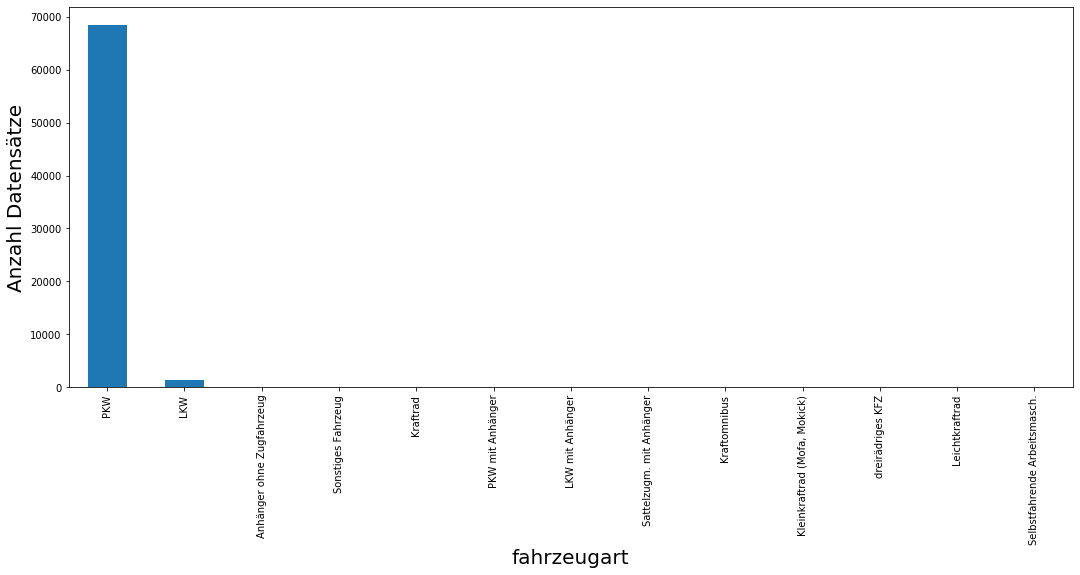

In [17]:
a4_dims = (18,7)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_ylabel("Anzahl Datensätze", fontsize=20)
ax.set_xlabel("Fabrikat", fontsize=20)
loc = plt.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax = df_kind.plot(kind='bar')
plt.xticks(rotation='vertical')

In [18]:
df_kind

fahrzeugart
PKW                             68445
LKW                              1433
Anhänger ohne Zugfahrzeug         139
Sonstiges Fahrzeug                 98
Kraftrad                           49
PKW mit Anhänger                   27
LKW mit Anhänger                   20
Sattelzugm. mit Anhänger           17
Kraftomnibus                       12
Kleinkraftrad (Mofa, Mokick)       11
dreirädriges KFZ                   10
Leichtkraftrad                      4
Selbstfahrende Arbeitsmasch.        1
dtype: int64

### Untersuchung der Tatbestände

In [19]:
df_tatbestand = df.groupby(['tatbestand1']).size()
df_tatbestand.sort_values(inplace=True, ascending=False)
df_tatbestand.head(10)

tatbestand1
113140    25884
141312     9177
141322     6197
112402     3418
142103     2352
141313     1510
112403     1299
113141     1274
141245     1208
113144     1169
dtype: int64

113140 Sie parkten im Bereich eines Parkscheinautomaten ohne gültigen (10,00) Parkschein.

141312 Sie parkten im absoluten Haltverbot (15,00)

141322 Sie parkten unzulässig im eingeschränkten Haltverbot (15,00)

112402 Sie parkten verbotswidrig auf dem Gehweg (20,00)



### Untersuchung des Ortes

In [20]:
df_ort = df.groupby(['strasse']).size()
df_ort.sort_values(inplace=True, ascending=False)
df_ort.head(10)

strasse
NEUSSER STR.        2203
VENLOER STR.        1608
HOHENZOLLERNRING    1189
FRANKFURTER STR.     675
KALKER HAUPTSTR.     614
MITTELSTR.           587
AACHENER STR.        554
DEUTZER FREIHEIT     550
EHRENSTR.            497
HAHNENSTR.           480
dtype: int64

### Achtung - politisch unkorrekt

Sie parkten länger als 1 Stunde auf einem unbeschilderten Radweg 35,00
und behinderten +) dadurch Andere.

In [21]:
df.loc[df['tatbestand1'] == '112445']

,Kennzeichen,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
Zeitpunkt,,,,,,,,
2017-01-18 08:51:00,HSK,PKW,MINI,BARBARASTR.,69,112445,NaN,NaN


Sie parkten verbotswidrig auf dem Gehweg (112402). Sie parkten im absoluten Haltverbot (141312). Sie parkten verbotswidrig auf der linken Fahrbahnseite/dem linken 0 15,00
Seitenstreifen (112042)

In [22]:
df_tat_mult = df.groupby(['fabrikat','tatbestand1','tatbestand2', 'tatbestand3']).size()
df_tat_mult.sort_values(inplace=True, ascending=False)
df_tat_mult.head(10)

fabrikat       tatbestand1  tatbestand2  tatbestand3
VW-VOLKSWAGEN  112402       141312       112042.A       5
AUDI           112402       141312       112042.A       5
MERCEDES       112402       141312       112042.A       5
BMW            112403       141312       112042.A       5
               112402       141312       112042.A       4
VW-VOLKSWAGEN  112403       141312       112042.A       3
MERCEDES       112403       141312       112042.A       3
VW-VOLKSWAGEN  112402       112042.A     141312         3
OPEL           112402       141312       112042.A       3
FORD           142273       141313       116136         2
dtype: int64

## Zeitfaktor

In [23]:
df.head()

,Kennzeichen,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
Zeitpunkt,,,,,,,,
2017-01-02 06:10:00,K,PKW,SKODA,HOCHSTADENSTR.,NaN,141312,NaN,NaN
2017-01-02 06:10:00,K,PKW,FORD,LUXEMBURGER STR.,19,141312,NaN,NaN
2017-01-02 06:25:00,K,PKW,FIAT,MOLTKESTR.,48A,141312,NaN,NaN
2017-01-02 06:25:00,OS,PKW,FORD,MOLTKESTR.,44,141312,NaN,NaN
2017-01-02 06:25:00,FB,PKW,AUDI,MOLTKESTR.,52,141312,NaN,NaN


In [24]:
df.shape

(70266, 8)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70266 entries, 2017-01-02 06:10:00 to 2017-01-31 22:11:00
Data columns (total 8 columns):
Kennzeichen    70266 non-null object
fahrzeugart    70266 non-null object
fabrikat       70181 non-null object
strasse        70266 non-null object
hausnummer     49191 non-null object
tatbestand1    70266 non-null object
tatbestand2    3881 non-null object
tatbestand3    301 non-null object
dtypes: object(8)
memory usage: 4.8+ MB


In [26]:
df_complete = df.copy()

In [27]:
df.drop(['tatbestand2', 'tatbestand3', 'hausnummer'], axis=1, inplace=True)

In [28]:
df['tatbestand1'] = df['tatbestand1'].str.replace(r'[^\d.]+', '')
df['tatbestand1'] = df['tatbestand1'].str.replace('.', '')

In [29]:
df.tatbestand1=pd.to_numeric(df.tatbestand1)

In [30]:
df.head()

,Kennzeichen,fahrzeugart,fabrikat,strasse,tatbestand1
Zeitpunkt,,,,,
2017-01-02 06:10:00,K,PKW,SKODA,HOCHSTADENSTR.,141312
2017-01-02 06:10:00,K,PKW,FORD,LUXEMBURGER STR.,141312
2017-01-02 06:25:00,K,PKW,FIAT,MOLTKESTR.,141312
2017-01-02 06:25:00,OS,PKW,FORD,MOLTKESTR.,141312
2017-01-02 06:25:00,FB,PKW,AUDI,MOLTKESTR.,141312


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70266 entries, 2017-01-02 06:10:00 to 2017-01-31 22:11:00
Data columns (total 5 columns):
Kennzeichen    70266 non-null object
fahrzeugart    70266 non-null object
fabrikat       70181 non-null object
strasse        70266 non-null object
tatbestand1    70266 non-null int64
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


### Filtern nach Neusser Str.

In [32]:
df_neusser = df[df['strasse'] == 'NEUSSER STR.']

In [33]:
df_neusser.head(10)

,Kennzeichen,fahrzeugart,fabrikat,strasse,tatbestand1
Zeitpunkt,,,,,
2017-01-02 07:23:00,K,PKW,SKODA,NEUSSER STR.,910321
2017-01-02 07:44:00,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,910321
2017-01-02 07:45:00,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,141322
2017-01-02 08:25:00,K,PKW,FIAT,NEUSSER STR.,910321
2017-01-02 08:25:00,GM,PKW,MERCEDES,NEUSSER STR.,910321
2017-01-02 08:25:00,M,PKW,SEAT,NEUSSER STR.,910421
2017-01-02 08:27:00,K,LKW,FIAT,NEUSSER STR.,910321
2017-01-02 08:27:00,K,PKW,OPEL,NEUSSER STR.,142278
2017-01-02 08:35:00,DN,PKW,FORD,NEUSSER STR.,142278


In [34]:
df_neusser.shape

(2203, 5)

Text(0.5, 0, 'Datum')

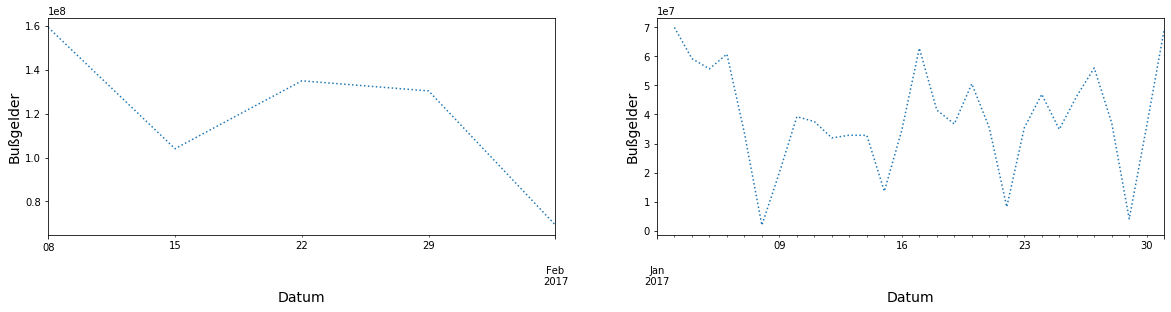

In [35]:
a4_dims = (20, 4)
fig, axs = plt.subplots(ncols=2, figsize=a4_dims)

weekly = df_neusser.tatbestand1.resample('W').sum()
weekly.plot(ax=axs[0], style=[':'])
axs[0].set_ylabel('Bußgelder', fontsize=14)
axs[0].set_xlabel('Datum', fontsize=14)

daily = df_neusser.tatbestand1.resample('D').sum()
daily.rolling(2, center=True).sum().plot(ax=axs[1],style=[':'])
axs[1].set_ylabel('Bußgelder', fontsize=14)
axs[1].set_xlabel('Datum', fontsize=14)

Text(0.5, 0, 'Datum')

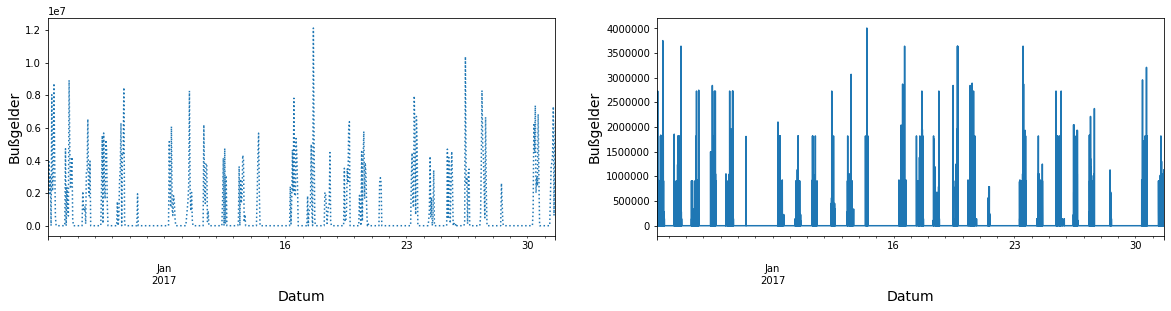

In [36]:
a4_dims = (20, 4)
fig, axs = plt.subplots(ncols=2, figsize=a4_dims)

weekly = df_neusser.tatbestand1.resample('H').sum()
weekly.plot(ax=axs[0], style=[':'])
axs[0].set_ylabel('Bußgelder', fontsize=14)
axs[0].set_xlabel('Datum', fontsize=14)

daily = df_neusser.tatbestand1.resample('1min').sum()
daily.rolling(2, center=True).sum().plot(ax=axs[1],style=['-'])
axs[1].set_ylabel('Bußgelder', fontsize=14)
axs[1].set_xlabel('Datum', fontsize=14)

### Daten korregieren

In [37]:
df_neusser_tb = df_neusser.groupby(['Zeitpunkt', 'tatbestand1']).size()
df_neusser_tb.sort_values(inplace=True, ascending=False)
# df_neusser_tb.info()

In [38]:
df = df_neusser_tb.to_frame().reset_index()

In [39]:
df.sort_values(by=['Zeitpunkt'], inplace=True, ascending=True)

In [40]:
df = df.rename(columns={0: 'Anzahl', 'tatbestand1': 'Tatbestand'})

In [41]:
#df['Zeitpunkt'] = df['Zeitpunkt'].dt.strftime('%d %H:%M')

In [42]:
df.head()

,Zeitpunkt,Tatbestand,Anzahl
1533,2017-01-02 07:23:00,910321,1
655,2017-01-02 07:44:00,910321,1
656,2017-01-02 07:45:00,141322,1
283,2017-01-02 08:25:00,910321,2
657,2017-01-02 08:25:00,910421,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 1533 to 1340
Data columns (total 3 columns):
Zeitpunkt     1534 non-null datetime64[ns]
Tatbestand    1534 non-null int64
Anzahl        1534 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 47.9 KB


In [44]:
df = df.set_index('Zeitpunkt')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1534 entries, 2017-01-02 07:23:00 to 2017-01-31 15:58:00
Data columns (total 2 columns):
Tatbestand    1534 non-null int64
Anzahl        1534 non-null int64
dtypes: int64(2)
memory usage: 36.0 KB


Text(0.5, 0, 'Datum')

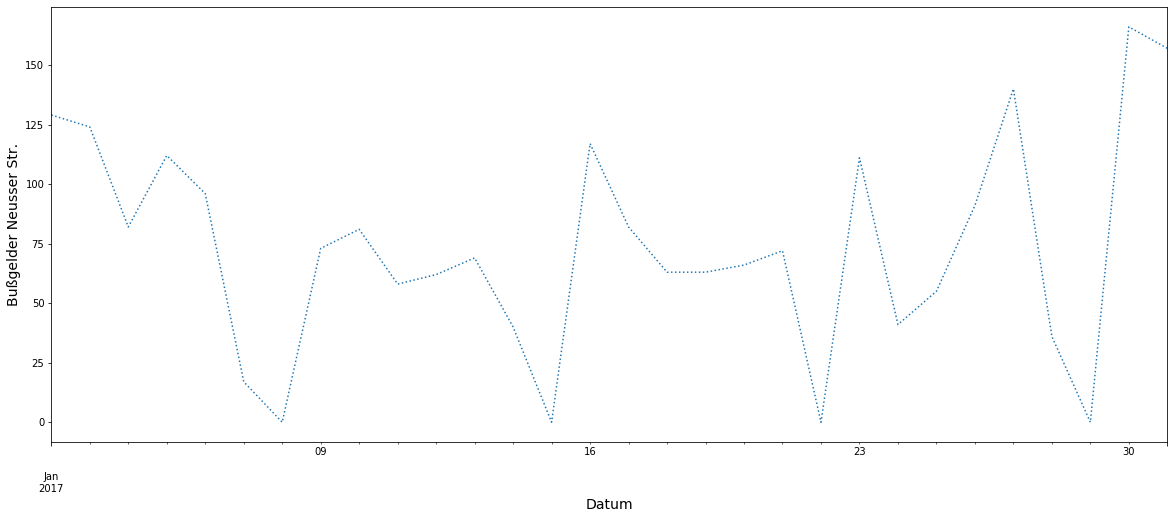

In [46]:
import matplotlib.ticker as plticker
a4_dims = (20, 8)
fig, axs = plt.subplots(ncols=1, figsize=a4_dims)

weekly = df.Anzahl.resample('D').sum()
weekly.plot(ax=axs, style=[':'])
axs.set_ylabel('Bußgelder Neusser Str.', fontsize=14)
axs.set_xlabel('Datum', fontsize=14)


In [47]:
import matplotlib as mpl
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

def plot_data(data, x_label):
    a4_dims = (20, 4)

    fig, axs = plt.subplots(ncols=1, figsize=a4_dims)
    
    axs.set_ylabel('Anzahl Bußgelder', fontsize=14)
    axs.set_xlabel(x_label, fontsize=14)
    data.Anzahl.plot(ax=axs, style=[':'], marker='.', 
                              color='#dd8452') #, xticks=hourly_ticks)
 
    for ax in fig.axes:
        mpl.pyplot.sca(ax)
        plt.xticks(rotation=90)

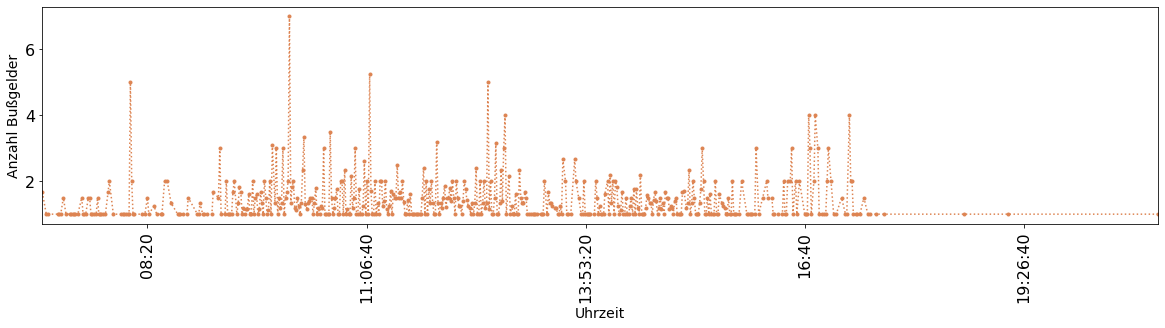

In [48]:
import numpy as np

by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
plot_data(by_time, 'Uhrzeit')

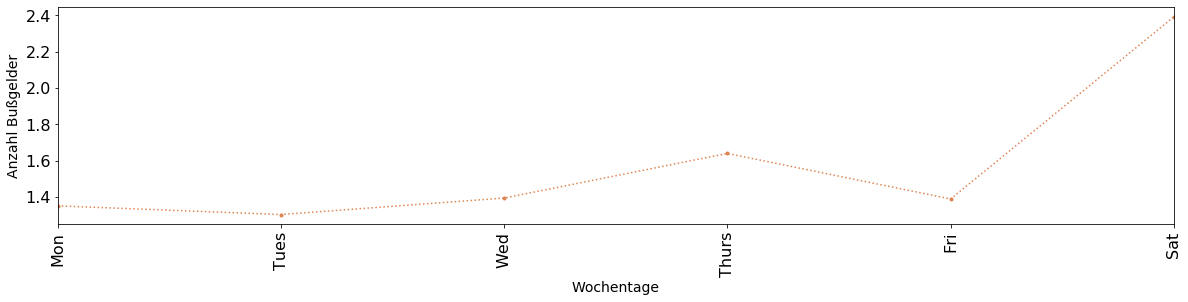

In [49]:
by_weekday = df.groupby(df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
plot_data(by_weekday, 'Wochentage')

In [50]:
df_new = df.copy()
del df_new['Tatbestand']

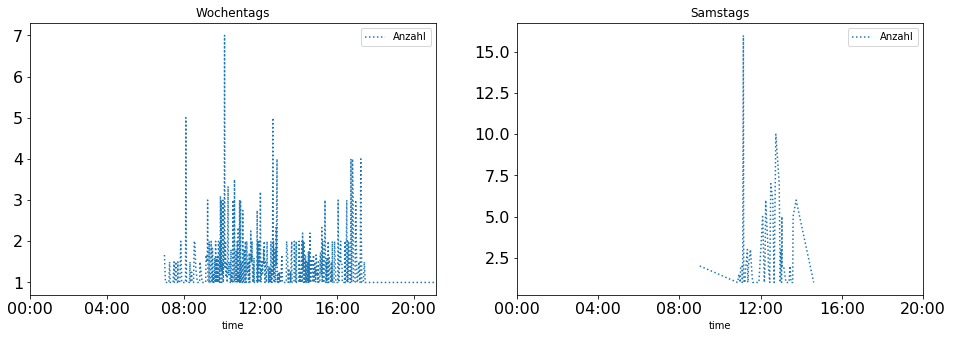

In [51]:
weekend = np.where(df_new.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df_new.groupby([weekend, df_new.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Wochentags',
                           xticks=hourly_ticks, style=[':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Samstags',
                           xticks=hourly_ticks, style=[':', '--']);

In [52]:
df_new= df_new.resample('H').sum()

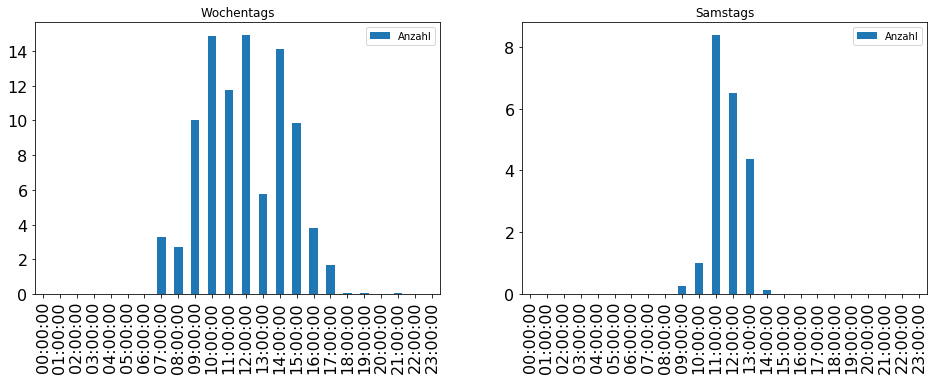

In [53]:
weekend = np.where(df_new.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df_new.groupby([weekend, df_new.index.time]).mean()

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Wochentags',
                           xticks=hourly_ticks, style=[':', '--'], kind='bar')
by_time.loc['Weekend'].plot(ax=ax[1], title='Samstags',
                           xticks=hourly_ticks, style=[':', '--'], kind='bar');

In [68]:
df_new.to_csv('neusser_data.csv', sep=';', encoding='utf-8')

## Kerrelationsmatrix & Streudiagramm

In [54]:
df_neusser_corr = df_neusser.copy()

In [55]:
df_neusser_corr.columns

Index(['Kennzeichen', 'fahrzeugart', 'fabrikat', 'strasse', 'tatbestand1'], dtype='object')

In [56]:
df_neusser_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2203 entries, 2017-01-02 07:23:00 to 2017-01-31 15:58:00
Data columns (total 5 columns):
Kennzeichen    2203 non-null object
fahrzeugart    2203 non-null object
fabrikat       2202 non-null object
strasse        2203 non-null object
tatbestand1    2203 non-null int64
dtypes: int64(1), object(4)
memory usage: 103.3+ KB


In [57]:
df_neusser_corr.head()

,Kennzeichen,fahrzeugart,fabrikat,strasse,tatbestand1
Zeitpunkt,,,,,
2017-01-02 07:23:00,K,PKW,SKODA,NEUSSER STR.,910321
2017-01-02 07:44:00,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,910321
2017-01-02 07:45:00,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,141322
2017-01-02 08:25:00,K,PKW,FIAT,NEUSSER STR.,910321
2017-01-02 08:25:00,GM,PKW,MERCEDES,NEUSSER STR.,910321


In [58]:
df_neusser_corr['day'] = df_neusser_corr.index.day
df_neusser_corr['weekday'] = df_neusser_corr.index.weekday
df_neusser_corr['hour'] = df_neusser_corr.index.hour

In [59]:
df_neusser_corr.head()

,Kennzeichen,fahrzeugart,fabrikat,strasse,tatbestand1,day,weekday,hour
Zeitpunkt,,,,,,,,
2017-01-02 07:23:00,K,PKW,SKODA,NEUSSER STR.,910321,2,0,7
2017-01-02 07:44:00,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,910321,2,0,7
2017-01-02 07:45:00,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,141322,2,0,7
2017-01-02 08:25:00,K,PKW,FIAT,NEUSSER STR.,910321,2,0,8
2017-01-02 08:25:00,GM,PKW,MERCEDES,NEUSSER STR.,910321,2,0,8


In [60]:
df_neusser_corr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2203 entries, 2017-01-02 07:23:00 to 2017-01-31 15:58:00
Data columns (total 8 columns):
Kennzeichen    2203 non-null object
fahrzeugart    2203 non-null object
fabrikat       2202 non-null object
strasse        2203 non-null object
tatbestand1    2203 non-null int64
day            2203 non-null int64
weekday        2203 non-null int64
hour           2203 non-null int64
dtypes: int64(4), object(4)
memory usage: 234.9+ KB


In [61]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(df_neusser_corr['Kennzeichen'])
# df_neusser_corr['Kennzeichen']= le.transform(df_neusser_corr['Kennzeichen'])

In [62]:
# df_neusser_corr.fabrikat = df_neusser_corr.fabrikat.astype(str)
# le.fit(df_neusser_corr['fabrikat'])
# df_neusser_corr['fabrikat']= le.transform(df_neusser_corr['fabrikat'])

# df_neusser_corr.fahrzeugart = df_neusser_corr.fahrzeugart.astype(str)
# le.fit(df_neusser_corr['fahrzeugart'])
# df_neusser_corr['fahrzeugart']= le.transform(df_neusser_corr['fahrzeugart'])

In [63]:
# del df_neusser_corr['strasse']

In [64]:
df_neusser_corr["Occ_Kennzeichen"] = df_neusser_corr.groupby("Kennzeichen").cumcount()+1
df_neusser_corr["Occ_Fahrzeugart"] = df_neusser_corr.groupby("fahrzeugart").cumcount()+1
df_neusser_corr["Occ_Fabrikat"] = df_neusser_corr.groupby("fabrikat").cumcount()+1
df_neusser_corr["Occ_Tatbestand"] = df_neusser_corr.groupby("tatbestand1").cumcount()+1

In [65]:
df_neusser_corr.head(10)

,Kennzeichen,fahrzeugart,fabrikat,strasse,tatbestand1,day,weekday,hour,Occ_Kennzeichen,Occ_Fahrzeugart,Occ_Fabrikat,Occ_Tatbestand
Zeitpunkt,,,,,,,,,,,,
2017-01-02 07:23:00,K,PKW,SKODA,NEUSSER STR.,910321,2,0,7,1,1,1,1
2017-01-02 07:44:00,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,910321,2,0,7,2,2,1,2
2017-01-02 07:45:00,K,PKW,VW-VOLKSWAGEN,NEUSSER STR.,141322,2,0,7,3,3,2,1
2017-01-02 08:25:00,K,PKW,FIAT,NEUSSER STR.,910321,2,0,8,4,4,1,3
2017-01-02 08:25:00,GM,PKW,MERCEDES,NEUSSER STR.,910321,2,0,8,1,5,1,4
2017-01-02 08:25:00,M,PKW,SEAT,NEUSSER STR.,910421,2,0,8,1,6,1,1
2017-01-02 08:27:00,K,LKW,FIAT,NEUSSER STR.,910321,2,0,8,5,1,2,5
2017-01-02 08:27:00,K,PKW,OPEL,NEUSSER STR.,142278,2,0,8,6,7,1,1
2017-01-02 08:35:00,DN,PKW,FORD,NEUSSER STR.,142278,2,0,8,1,8,1,2


(7.0, 0.0)

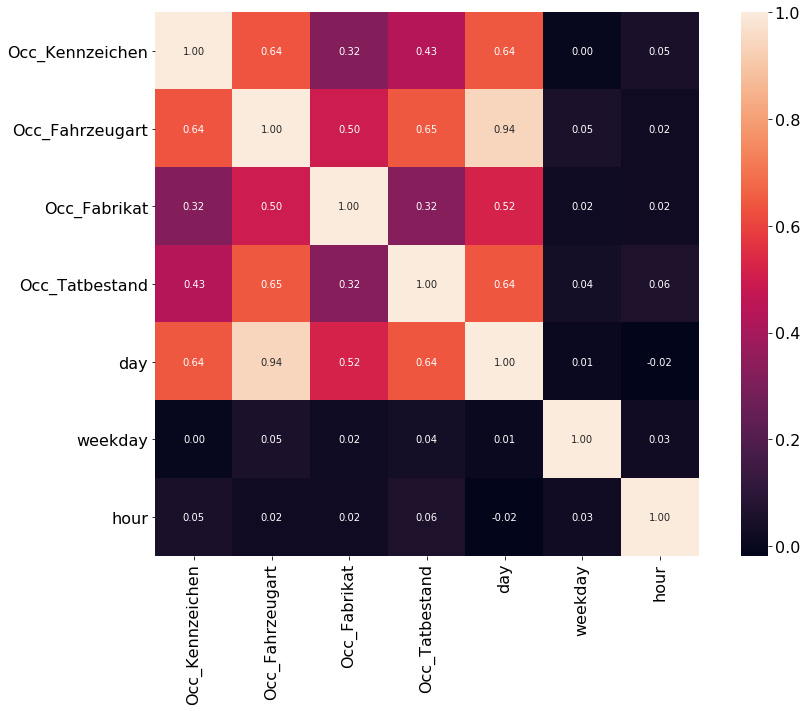

In [66]:
fig, ax = plt.subplots(figsize=(15,10))
cols = ['Occ_Kennzeichen', 'Occ_Fahrzeugart', 'Occ_Fabrikat',
       'Occ_Tatbestand','day', 'weekday', 'hour']
cm = np.corrcoef(df_neusser_corr[cols].values.T)

ax = sns.heatmap(cm, cbar=True, annot= True, square= True,fmt= '.2f', 
                 yticklabels=cols, xticklabels=cols)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

C:\Users\JMartens\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\JMartens\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


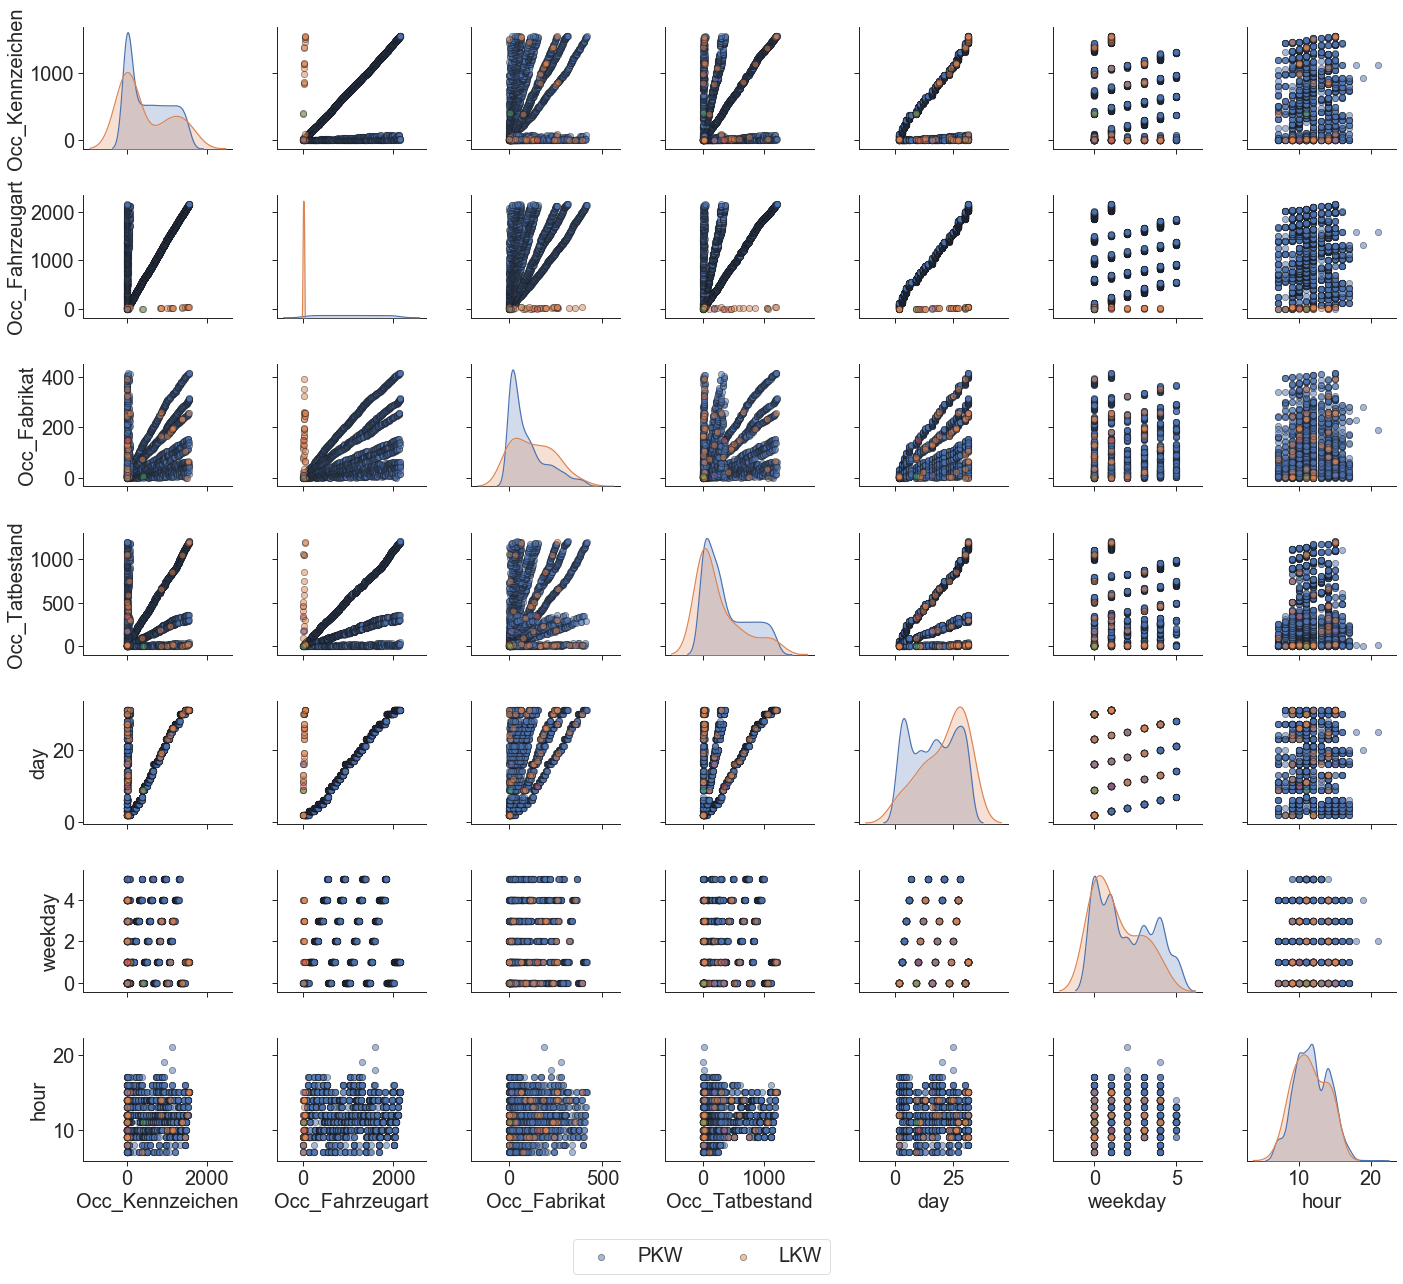

In [67]:
sns.set(style="ticks", color_codes=True)
sns.set_context("paper", rc={"axes.labelsize":20, "xtick.labelsize":20, "ytick.labelsize":20})
pairplot = sns.pairplot(df_neusser_corr, hue='fahrzeugart', vars=['Occ_Kennzeichen', 'Occ_Fahrzeugart', 'Occ_Fabrikat',
       'Occ_Tatbestand','day', 'weekday', 'hour'], height=2.5, plot_kws=
    {
    "s":40,
    "alpha":0.5,
    'lw':0.5,
    'edgecolor':'k',
    })
#plt.legend(loc='upper left',bbox_to_anchor=(1.0, 0.5))
pairplot._legend.remove()
plt.tight_layout()


handles = pairplot._legend_data.values()
labels = pairplot._legend_data.keys()

pairplot.fig.legend(handles=handles, labels=('PKW', 'LKW'), loc='lower center', ncol=3, fontsize=20)
pairplot.fig.subplots_adjust(top=1.0, bottom=0.1)